In [1]:
from PIL import Image

import pytesseract

In [2]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

In [3]:
print(pytesseract.get_languages(config=''))

['eng', 'osd']


In [74]:
print(pytesseract.image_to_string('/kaggle/input/test-image/IMG-20230908-WA0005.jpg'))

In [83]:
print(pytesseract.image_to_boxes(Image.open('/kaggle/input/test-image/IMG-20230908-WA0005.jpg')))

In [85]:
print(pytesseract.image_to_data(Image.open('/kaggle/input/test-image/IMG-20230908-WA0005.jpg')))


level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	452	1152	-1	
2	1	1	0	0	0	130	30	322	143	-1	
3	1	1	1	0	0	130	30	322	143	-1	
4	1	1	1	1	0	130	30	271	63	-1	
5	1	1	1	1	1	111	26	124	87	6	Cope
5	1	1	1	1	2	251	26	110	87	50	sates)
5	1	1	1	1	3	379	60	22	4	55	=
4	1	1	1	2	0	281	67	81	26	-1	
5	1	1	1	2	1	281	88	45	5	25	ae
5	1	1	1	2	2	334	67	28	20	64	2
4	1	1	1	3	0	143	132	309	41	-1	
5	1	1	1	3	1	143	145	94	28	64	compen
5	1	1	1	3	2	248	144	27	15	77	sa
5	1	1	1	3	3	283	132	45	24	63	hn
5	1	1	1	3	4	352	148	28	3	1	—
2	1	2	0	0	0	30	188	422	80	-1	
3	1	2	1	0	0	30	192	422	72	-1	
4	1	2	1	1	0	30	194	206	40	-1	
5	1	2	1	1	1	30	206	43	28	0	-
5	1	2	1	1	2	163	194	73	21	0	_
4	1	2	1	2	0	95	188	357	80	-1	
5	1	2	1	2	1	95	211	120	57	11	Gior
5	1	2	1	2	2	193	188	160	73	0	vensalee>
5	1	2	1	2	3	437	222	15	25	39	y
2	1	3	0	0	0	269	292	63	7	-1	
3	1	3	1	0	0	269	292	63	7	-1	
4	1	3	1	1	0	269	292	63	7	-1	
5	1	3	1	1	1	269	292	63	7	0	——$—
2	1	4	0	0	0	38	304	414	623	-1	
3	1	4	1	0	0	38	3

In [86]:
print(pytesseract.image_to_osd(Image.open('/kaggle/input/test-image/IMG-20230908-WA0005.jpg')))

Page number: 0
Orientation in degrees: 180
Rotate: 180
Orientation confidence: 2.35
Script: Japanese
Script confidence: 1.07



In [87]:
pdf = pytesseract.image_to_pdf_or_hocr('/kaggle/input/test-image/IMG-20230908-WA0005.jpg', extension='pdf')
with open('test.pdf', 'w+b') as f:
    f.write(pdf) # pdf type is bytes by default

In [88]:
def image_to_pdf_or_hocr(
    image,
    lang=None,
    config='',
    nice=0,
    extension='pdf',
    timeout=0,
):
    """
    Returns the result of a Tesseract OCR run on the provided image to pdf/hocr
    """

    if extension not in {'pdf', 'hocr'}:
        raise ValueError(f'Unsupported extension: {extension}')

    if extension == 'hocr':
        config = f'-c tessedit_create_hocr=1 {config.strip()}'

    args = [image, extension, lang, config, nice, timeout, True]
     # Run Tesseract and save the output to a file
    temp_output_file = '/tmp/tesseract_output.' + extension
    pytesseract.run_and_get_output(args, temp_output_file)

    # Read the output content from the saved file
    with open(temp_output_file, 'rb') as file:
        output_content = file.read()

    return run_and_get_output(*args,output_content)

In [90]:
hocr = pytesseract.image_to_pdf_or_hocr('/kaggle/input/test-image/IMG-20230908-WA0005.jpg', extension='hocr')
print(hocr)
output_file = '/kaggle/working/output_1.hocr'  # Provide the desired output file path
with open(output_file, 'wb') as f:
    f.write(hocr)

b'<?xml version="1.0" encoding="UTF-8"?>\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"\n    "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">\n <head>\n  <title></title>\n  <meta http-equiv="Content-Type" content="text/html;charset=utf-8"/>\n  <meta name=\'ocr-system\' content=\'tesseract 4.1.1\' />\n  <meta name=\'ocr-capabilities\' content=\'ocr_page ocr_carea ocr_par ocr_line ocrx_word ocrp_wconf\'/>\n </head>\n <body>\n  <div class=\'ocr_page\' id=\'page_1\' title=\'image "/kaggle/input/test-image/IMG-20230908-WA0005.jpg"; bbox 0 0 452 1152; ppageno 0\'>\n   <div class=\'ocr_carea\' id=\'block_1_1\' title="bbox 30 27 452 271">\n    <p class=\'ocr_par\' id=\'par_1_1\' lang=\'eng\' title="bbox 30 27 452 264">\n     <span class=\'ocr_line\' id=\'line_1_1\' title="bbox 130 27 401 93; baseline -0.026 2; x_size 77; x_descenders 18; x_ascenders 25">\n      <span class=\'ocrx_word\' id=\'word_1_

In [91]:
xml = pytesseract.image_to_alto_xml('/kaggle/input/test-image/IMG-20230908-WA0005.jpg')
print(xml)
output_file = '/kaggle/working/xml'  # Provide the desired output file path
with open(output_file, 'wb') as f:
    f.write(xml)

b'<?xml version="1.0" encoding="UTF-8"?>\n<alto xmlns="http://www.loc.gov/standards/alto/ns-v3#" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.loc.gov/standards/alto/ns-v3# http://www.loc.gov/alto/v3/alto-3-0.xsd">\n\t<Description>\n\t\t<MeasurementUnit>pixel</MeasurementUnit>\n\t\t<sourceImageInformation>\n\t\t\t<fileName></fileName>\n\t\t</sourceImageInformation>\n\t\t<OCRProcessing ID="OCR_0">\n\t\t\t<ocrProcessingStep>\n\t\t\t\t<processingSoftware>\n\t\t\t\t\t<softwareName>tesseract 4.1.1</softwareName>\n\t\t\t\t</processingSoftware>\n\t\t\t</ocrProcessingStep>\n\t\t</OCRProcessing>\n\t</Description>\n\t<Layout>\n\t\t<Page WIDTH="452" HEIGHT="1152" PHYSICAL_IMG_NR="0" ID="page_0">\n\t\t\t<PrintSpace HPOS="0" VPOS="0" WIDTH="452" HEIGHT="1152">\n\t\t\t\t<ComposedBlock ID="cblock_0" HPOS="30" VPOS="27" WIDTH="422" HEIGHT="244">\n\t\t\t\t\t<TextBlock ID="block_0" HPOS="30" VPOS="27" WIDTH="422" HEIGHT="2

# To get the lines

In [82]:
import json
import bs4
xml_input = open("/kaggle/working/output.hocr","r",encoding="utf-8")
soup = bs4.BeautifulSoup(xml_input,'xml')
ocr_lines = soup.findAll("span", {"class": "ocr_line"})
#We will save coordinates of line and the text contained in the line in lines_structure list
lines_structure = []
for line in ocr_lines:
    line_text = line.text.replace("\n"," ").strip()
    title = line['title']
    #The coordinates of the bounding box
    x1,y1,x2,y2 = map(int, title[5:title.find(";")].split())
    lines_structure.append({"x1":x1,"y1":y1,"x2":x2,"y2":y2,"text": line_text})
    #print(lines_structure)
    output_file_path = '/kaggle/working/lines_structure.json'

# Save the lines_structure as a JSON file
with open(output_file_path, 'w', encoding='utf-8') as json_file:
    json.dump(lines_structure, json_file, ensure_ascii=False, indent=4)
   

# **From Sratch**

In [12]:
import pytesseract
from bs4 import BeautifulSoup
from PIL import Image
import re
import numpy as np
import math
import cv2
import itertools
from collections import namedtuple
import matplotlib.pyplot as plt

In [13]:
get_ipython().run_line_magic('matplotlib', 'inline')

In [14]:
def pre_process(image):
    """
    Image pre-processing entails finding all of the png image files and
    applying a number of cleaning steps to them.
    """
    
    # Read in as greyscale
    concatenated = np.array(image.convert('L'))

    # Threshold image to black/white (threshold = 127 I presume)
    num, grey_composite = cv2.threshold(concatenated, 127, 255, cv2.THRESH_BINARY)

    # inverting the image for morphological operations
    inverted_composite = 255 - grey_composite

    # Perform closing, dilation followed by erosion
    kernel = np.ones((2, 2), np.uint8)
    closed_composite = cv2.morphologyEx(inverted_composite, cv2.MORPH_CLOSE, kernel)

    # Undo inversion
    closed_composite = 255 - closed_composite

    # Write over original with processed version
    return Image.fromarray(closed_composite)

In [15]:
def gray2rgb(image):
    img = np.array(image)
    img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    return img



In [16]:
BoundingBox = namedtuple('BoundingBox', 'left top right bottom')

In [17]:
class Word:
    text = None
    conf = None
    bbox = None
    id = None
    def __init__(self, tag):
        self.text = tag.text
        self.conf = tag_conf(tag)
        self.bbox = tag_bbox(tag)
        self.id = tag.get('id').replace('word_','')
    def __str__(self):
        return self.text
    def __repr__(self):
        return f'Word<{self.id}>'
    def get_numeric(self):
        return convert_to_numeric(self.text)

In [18]:
class Block:
    bbox = None
    text = None
    words = []
    def __init__(self, word: Word):
        self.bbox = word.bbox
        self.text = word.text
        self.words = [word]
    def add(self, word):
        self.bbox = BoundingBox(
            min(word.bbox.left, self.bbox.left),
            min(word.bbox.top, self.bbox.top),
            max(word.bbox.right, self.bbox.right),
            max(word.bbox.bottom, self.bbox.bottom))
        self.text += ' ' + word.text
        self.words.append(word)
    def get_numeric(self):
        return convert_to_numeric(self.text)

In [19]:
class Line:
    bbox = None
    words = None
    blocks = None
    id = None
    def __init__(self, tag, h_toll=30):
        self.bbox = tag_bbox(tag)
        self.words = [Word(word) for word in tag.find_all('span', 'ocrx_word')]
        self.id = tag.get('id').replace('line_','')
        
        # group words into blocks        
        blocks = []
        block = Block(self.words[0])
        for word in self.words[1:]:
            if (word.bbox.left - block.bbox.right) < h_toll:
                block.add(word)
            else:
                blocks.append(block)
                block = Block(word)
        blocks.append(block)
        self.blocks = blocks
        
    def __repr__(self):
        return f'Line<{self.id}>'
    def __str__(self):
        return ' '.join([str(word) for word in self.words])
    def get_text(self):
        return str(self)


In [20]:
    
class Page:
    image = None
    bbox = None
    lines = None
    id = None
    def __init__(self, image: Image, id=0, h_toll=30):
        self.id = id
        self.image = image
        text = pytesseract.image_to_pdf_or_hocr(image, lang='eng', config='--oem 3 --psm 4', extension='hocr')
        soup = BeautifulSoup(text, 'html.parser')
        page = soup.find('div', 'ocr_page')
        self.bbox = tag_bbox(page)
        self.lines = [Line(line, h_toll) for line in page.find_all('span', 'ocr_line')]
    def __repr__(self):
        return f'Page<{self.id}>'
    
    def get_words(self):
        for line in self.lines:
            for word in line.words:
                yield word
    
    def get_blocks(self):
        for line in self.lines:
            for block in line.blocks:
                yield block
    
    def plot_blocks(self):
        #img = np.array(self.image)
        img = gray2rgb(self.image)
        colors = [(255,0,0), (0,255,0)]
        for block in self.get_blocks():
            color = colors[int(np.isnan(block.get_numeric()))]
            draw_rect(img, block.bbox, color, 0.2)
        return Image.fromarray(img)
    
    def plot_words(self):
        #img = np.array(self.image)
        img = gray2rgb(self.image)
        for word in self.get_words():
            draw_rect(img, word.bbox, (100,100,0), 0.2)
        return Image.fromarray(img)
    
    def plot_lines(self):
        #img = np.array(self.image)
        img = gray2rgb(self.image)
        for line in self.lines:
            draw_rect(img, line.bbox, (0,100,100), 0.2)
        return Image.fromarray(img)
    
    def get_text(self):
        return '\n'.join([line.get_text() for line in self.lines])
        

def tag_bbox(tag):
    title = tag.get('title')
    match = re.search('bbox ([0-9]+) ([0-9]+) ([0-9]+) ([0-9]+)', title)
    values = [int(x) for x in match.groups()]
    return BoundingBox(*values)


def tag_conf(tag):
    title = tag.get('title')
    match = re.search('x_wconf ([0-9]+)', title)
    return int(match.group(1))


def draw_rect(img, bb, color, alpha):
    overlay = img.copy()
    cv2.rectangle(overlay, (bb.left, bb.top), (bb.right, bb.bottom), color, -1)
    cv2.addWeighted(overlay, alpha, img, 1-alpha, 0, img)
    cv2.rectangle(img, (bb.left, bb.top), (bb.right, bb.bottom), color, 2)
    return img


def convert_to_numeric(value):
    """
    Converts a pandas series object (of strings) to numeric if possible.
    If not possible, will return numpy.nan.
    """
    try:
        x = (str(value).replace(" ","").replace("$","").replace("|","")
             .replace(",", "").replace("(", "-").replace(")", ""))
        return np.float(x)
    except:
        return np.nan

In [21]:
image = Image.open('/kaggle/input/test-image/IMG-20230908-WA0005.jpg')

In [22]:
page = Page(image)

Cong sata
_— 2
compen sa hen —
a —
Gior yen saber> y
———
Comper catory, a
Competence - *
é
cannon =
compilabirg —
comp) be
com piled
comple ane
comple nen by


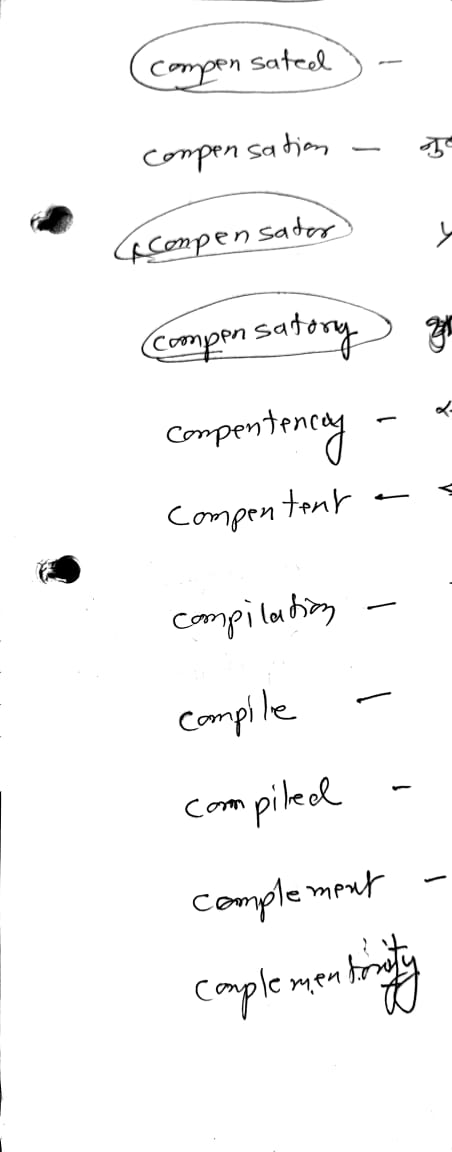

In [23]:
print(page.get_text())
page.image


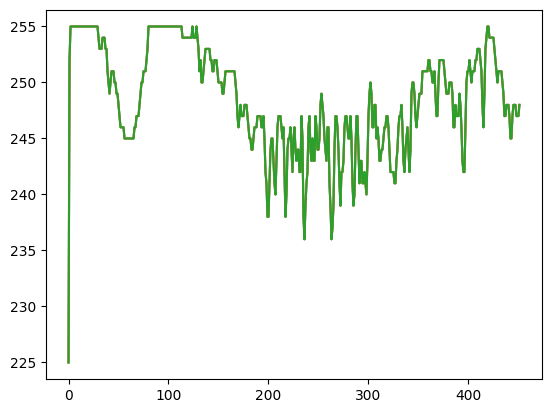

In [24]:
img = np.array(page.image)
h_concentration = cv2.reduce(img, 0, cv2.REDUCE_AVG, dtype=cv2.CV_32S)
plt.plot(h_concentration[0])


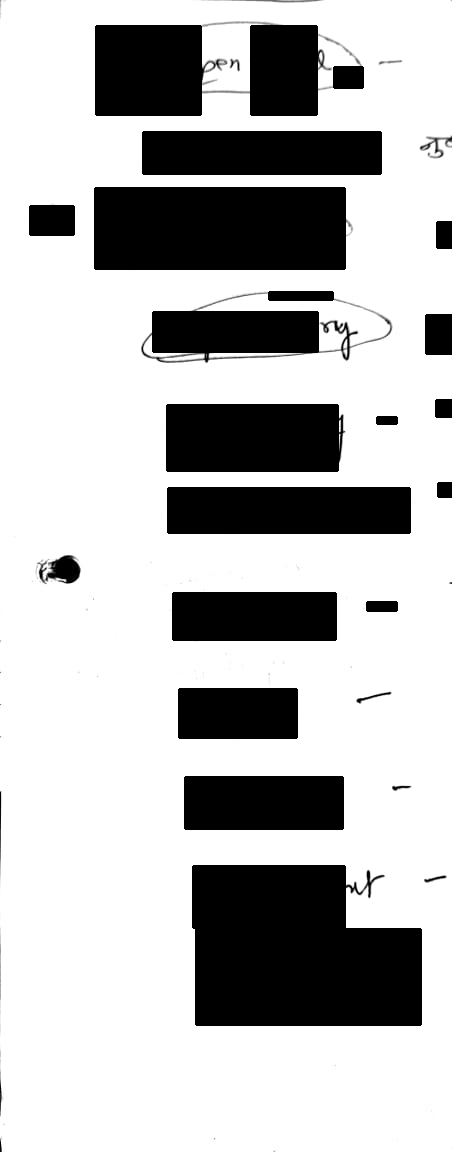

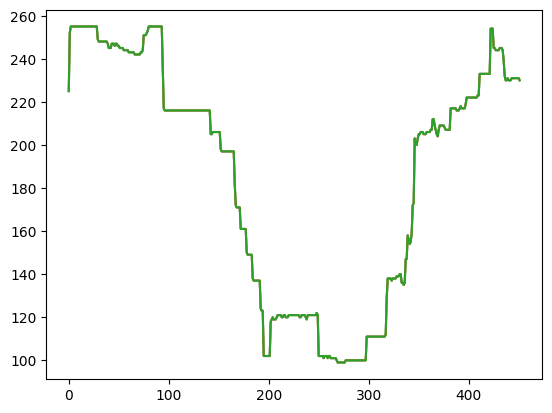

In [25]:

img = np.array(page.image)

for block in page.get_blocks():
    draw_rect(img, block.bbox, (0,0,0), 1)

    
h_concentration = cv2.reduce(img, 0, cv2.REDUCE_AVG, dtype=cv2.CV_32S)
plt.plot(h_concentration[0])    
Image.fromarray(img)

In [26]:

img = np.array(page.image)
img.fill(255)

#for block in numeric_blocks:
for block in page.get_blocks():
    draw_rect(img, block.bbox, 0, 1)

#Image.fromarray(img)

h_concentration = cv2.reduce(img, 0, cv2.REDUCE_AVG, dtype=cv2.CV_32S)
h_concentration = np.reshape(h_concentration, page.bbox.right)
plt.plot(h_concentration[0]) 

v_concentration = cv2.reduce(img, 1, cv2.REDUCE_AVG, dtype=cv2.CV_32S)
v_concentration = np.reshape(v_concentration, page.bbox.bottom)
plt.plot(v_concentration) 

ValueError: cannot reshape array of size 1356 into shape (452,)

In [27]:
img = gray2rgb(page.image)

overlay = img.copy()

alpha = 0.4
threshold = 230

for i, x in enumerate(h_concentration):
   color = 0 if int(x) > threshold else (0,255,0)
   cv2.line(overlay, (i,0), (i,page.bbox.bottom), color)

cv2.addWeighted(overlay, alpha, img, 1-alpha, 0, img)
    
for i, x in enumerate(v_concentration):
    color = 0 if int(x) > threshold else (255,0,0)
    cv2.line(overlay, (0,i), (page.bbox.right,i), color)
    
cv2.addWeighted(overlay, alpha, img, 1-alpha, 0, img)

Image.fromarray(img)


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<1>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 3


**scratch Code Changes**

In [28]:
!git clone https://github.com/madmaze/pytesseract.git

Cloning into 'pytesseract'...
remote: Enumerating objects: 1883, done.
remote: Counting objects: 100% (534/534), done.
remote: Compressing objects: 100% (296/296), done.
remote: Total 1883 (delta 256), reused 476 (delta 215), pack-reused 1349
Receiving objects: 100% (1883/1883), 1.49 MiB | 7.36 MiB/s, done.
Resolving deltas: 100% (1015/1015), done.


In [29]:
import logging
import re
import shlex
import string
import subprocess
import sys
from contextlib import contextmanager
from csv import QUOTE_NONE
from errno import ENOENT
from functools import wraps
from glob import iglob
from io import BytesIO
from os import environ
from os import extsep
from os import linesep
from os import remove
from os.path import normcase
from os.path import normpath
from os.path import realpath
from pkgutil import find_loader
from tempfile import NamedTemporaryFile
from time import sleep
from typing import List
from typing import Optional

from packaging.version import InvalidVersion
from packaging.version import parse
from packaging.version import Version
from PIL import Image

In [30]:

tesseract_cmd = 'tesseract'

numpy_installed = find_loader('numpy') is not None
if numpy_installed:
    from numpy import ndarray

pandas_installed = find_loader('pandas') is not None
if pandas_installed:
    import pandas as pd

In [31]:
LOGGER = logging.getLogger('pytesseract')


In [32]:
LOGGER = logging.getLogger('pytesseract')

DEFAULT_ENCODING = 'utf-8'
LANG_PATTERN = re.compile('^[a-z_]+$')
RGB_MODE = 'RGB'
SUPPORTED_FORMATS = {
    'JPEG',
    'JPEG2000',
    'PNG',
    'PBM',
    'PGM',
    'PPM',
    'TIFF',
    'BMP',
    'GIF',
    'WEBP',
}

In [33]:
SUPPORTED_FORMATS = {
    'JPEG',
    'JPEG2000',
    'PNG',
    'PBM',
    'PGM',
    'PPM',
    'TIFF',
    'BMP',
    'GIF',
    'WEBP',
}


In [34]:
OSD_KEYS = {
    'Page number': ('page_num', int),
    'Orientation in degrees': ('orientation', int),
    'Rotate': ('rotate', int),
    'Orientation confidence': ('orientation_conf', float),
    'Script': ('script', str),
    'Script confidence': ('script_conf', float),
}

In [35]:
EXTENTION_TO_CONFIG = {
    'box': 'tessedit_create_boxfile=1 batch.nochop makebox',
    'xml': 'tessedit_create_alto=1',
    'hocr': 'tessedit_create_hocr=1',
    'tsv': 'tessedit_create_tsv=1',
}
 

In [36]:
TESSERACT_MIN_VERSION = Version('3.05')
TESSERACT_ALTO_VERSION = Version('4.1.0')


In [37]:
class Output:
    BYTES = 'bytes'
    DATAFRAME = 'data.frame'
    DICT = 'dict'
    STRING = 'string'



In [38]:
class PandasNotSupported(EnvironmentError):
    def __init__(self):
        super().__init__('Missing pandas package')



In [39]:
class TesseractError(RuntimeError):
    def __init__(self, status, message):
        self.status = status
        self.message = message
        self.args = (status, message)


In [40]:
class TesseractNotFoundError(EnvironmentError):
    def __init__(self):
        super().__init__(
            f"{tesseract_cmd} is not installed or it's not in your PATH."
            f' See README file for more information.',
        )

In [41]:
class TSVNotSupported(EnvironmentError):
    def __init__(self):
        super().__init__(
            'TSV output not supported. Tesseract >= 3.05 required',
        )



In [42]:
class ALTONotSupported(EnvironmentError):
    def __init__(self):
        super().__init__(
            'ALTO output not supported. Tesseract >= 4.1.0 required',
        )

In [43]:
def kill(process, code):
    process.terminate()
    try:
        process.wait(1)
    except TypeError:  # python2 Popen.wait(1) fallback
        sleep(1)
    except Exception:  # python3 subprocess.TimeoutExpired
        pass
    finally:
        process.kill()
        process.returncode = code

In [44]:
@contextmanager
def timeout_manager(proc, seconds=None):
    try:
        if not seconds:
            yield proc.communicate()[1]
            return

        try:
            _, error_string = proc.communicate(timeout=seconds)
            yield error_string
        except subprocess.TimeoutExpired:
            kill(proc, -1)
            raise RuntimeError('Tesseract process timeout')
    finally:
        proc.stdin.close()
        proc.stdout.close()
        proc.stderr.close()


In [45]:
def run_once(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        if not kwargs.pop('cached', False) or wrapper._result is wrapper:
            wrapper._result = func(*args, **kwargs)
        return wrapper._result

    wrapper._result = wrapper
    return wrapper

In [46]:
def get_errors(error_string):
    return ' '.join(
        line for line in error_string.decode(DEFAULT_ENCODING).splitlines()
    ).strip()


In [47]:
def cleanup(temp_name):
    """Tries to remove temp files by filename wildcard path."""
    for filename in iglob(f'{temp_name}*' if temp_name else temp_name):
        try:
            remove(filename)
        except OSError as e:
            if e.errno != ENOENT:
                raise


In [48]:
def prepare(image):
    if numpy_installed and isinstance(image, ndarray):
        image = Image.fromarray(image)

    if not isinstance(image, Image.Image):
        raise TypeError('Unsupported image object')

    extension = 'PNG' if not image.format else image.format
    if extension not in SUPPORTED_FORMATS:
        raise TypeError('Unsupported image format/type')

    if 'A' in image.getbands():
        # discard and replace the alpha channel with white background
        background = Image.new(RGB_MODE, image.size, (255, 255, 255))
        background.paste(image, (0, 0), image.getchannel('A'))
        image = background

    image.format = extension
    return image, extension

In [49]:
@contextmanager
def save(image):
    try:
        with NamedTemporaryFile(prefix='tess_', delete=False) as f:
            if isinstance(image, str):
                yield f.name, realpath(normpath(normcase(image)))
                return
            image, extension = prepare(image)
            input_file_name = f'{f.name}_input{extsep}{extension}'
            image.save(input_file_name, format=image.format)
            yield f.name, input_file_name
    finally:
        cleanup(f.name)

In [50]:
def subprocess_args(include_stdout=True):
    # See https://github.com/pyinstaller/pyinstaller/wiki/Recipe-subprocess
    # for reference and comments.

    kwargs = {
        'stdin': subprocess.PIPE,
        'stderr': subprocess.PIPE,
        'startupinfo': None,
        'env': environ,
    }

    if hasattr(subprocess, 'STARTUPINFO'):
        kwargs['startupinfo'] = subprocess.STARTUPINFO()
        kwargs['startupinfo'].dwFlags |= subprocess.STARTF_USESHOWWINDOW
        kwargs['startupinfo'].wShowWindow = subprocess.SW_HIDE

    if include_stdout:
        kwargs['stdout'] = subprocess.PIPE
    else:
        kwargs['stdout'] = subprocess.DEVNULL

    return kwargs


In [51]:
def run_tesseract(
    input_filename,
    output_filename_base,
    extension,
    lang,
    config='',
    nice=0,
    timeout=0,
):
    cmd_args = []
    not_windows = not (sys.platform == 'win32')

    if not_windows and nice != 0:
        cmd_args += ('nice', '-n', str(nice))

    cmd_args += (tesseract_cmd, input_filename, output_filename_base)

    if lang is not None:
        cmd_args += ('-l', lang)

    if config:
        cmd_args += shlex.split(config, posix=not_windows)

    for _extension in extension.split():
        if _extension not in {'box', 'osd', 'tsv', 'xml'}:
            cmd_args.append(_extension)
    LOGGER.debug('%r', cmd_args)

    try:
        proc = subprocess.Popen(cmd_args, **subprocess_args())
    except OSError as e:
        if e.errno != ENOENT:
            raise
        else:
            raise TesseractNotFoundError()

    with timeout_manager(proc, timeout) as error_string:
        if proc.returncode:
            raise TesseractError(proc.returncode, get_errors(error_string))


In [52]:
def _read_output(filename: str, return_bytes: bool = False):
    with open(filename, 'rb') as output_file:
        if return_bytes:
            return output_file.read()
        return output_file.read().decode(DEFAULT_ENCODING)

In [53]:
def run_and_get_multiple_output(
    image,
    extensions: List[str],
    lang: Optional[str] = None,
    nice: int = 0,
    timeout: int = 0,
    return_bytes: bool = False,
):
    config = ' '.join(
        EXTENTION_TO_CONFIG.get(extension, '') for extension in extensions
    ).strip()
    if config:
        config = f'-c {config}'
    else:
        config = ''

    with save(image) as (temp_name, input_filename):
        kwargs = {
            'input_filename': input_filename,
            'output_filename_base': temp_name,
            'extension': ' '.join(extensions),
            'lang': lang,
            'config': config,
            'nice': nice,
            'timeout': timeout,
        }

        run_tesseract(**kwargs)

        return [
            _read_output(
                f"{kwargs['output_filename_base']}{extsep}{extension}",
                True if extension in {'pdf', 'hocr'} else return_bytes,
            )
            for extension in extensions
        ]


In [54]:

def run_and_get_output(
    image,
    extension='',
    lang=None,
    config='',
    nice=0,
    timeout=0,
    return_bytes=False,
):
    with save(image) as (temp_name, input_filename):
        kwargs = {
            'input_filename': input_filename,
            'output_filename_base': temp_name,
            'extension': extension,
            'lang': lang,
            'config': config,
            'nice': nice,
            'timeout': timeout,
        }

        run_tesseract(**kwargs)
        return _read_output(
            f"{kwargs['output_filename_base']}{extsep}{extension}",
            return_bytes,
        )

In [55]:
def file_to_dict(tsv, cell_delimiter, str_col_idx):
    result = {}
    rows = [row.split(cell_delimiter) for row in tsv.strip().split('\n')]
    if len(rows) < 2:
        return result

    header = rows.pop(0)
    length = len(header)
    if len(rows[-1]) < length:
        # Fixes bug that occurs when last text string in TSV is null, and
        # last row is missing a final cell in TSV file
        rows[-1].append('')

    if str_col_idx < 0:
        str_col_idx += length

    for i, head in enumerate(header):
        result[head] = list()
        for row in rows:
            if len(row) <= i:
                continue

            if i != str_col_idx:
                try:
                    val = int(float(row[i]))
                except ValueError:
                    val = row[i]
            else:
                val = row[i]

            result[head].append(val)

    return result


In [56]:
def is_valid(val, _type):
    if _type is int:
        return val.isdigit()

    if _type is float:
        try:
            float(val)
            return True
        except ValueError:
            return False

    return True

In [57]:
def osd_to_dict(osd):
    return {
        OSD_KEYS[kv[0]][0]: OSD_KEYS[kv[0]][1](kv[1])
        for kv in (line.split(': ') for line in osd.split('\n'))
        if len(kv) == 2 and is_valid(kv[1], OSD_KEYS[kv[0]][1])
    }


In [58]:
@run_once
def get_languages(config=''):
    cmd_args = [tesseract_cmd, '--list-langs']
    if config:
        cmd_args += shlex.split(config)

    try:
        result = subprocess.run(
            cmd_args,
            stdout=subprocess.PIPE,
            stderr=subprocess.STDOUT,
        )
    except OSError:
        raise TesseractNotFoundError()

    # tesseract 3.x
    if result.returncode not in (0, 1):
        raise TesseractNotFoundError()

    languages = []
    if result.stdout:
        for line in result.stdout.decode(DEFAULT_ENCODING).split(linesep):
            lang = line.strip()
            if LANG_PATTERN.match(lang):
                languages.append(lang)

    return languages

In [59]:
@run_once
def get_tesseract_version():
    """
    Returns Version object of the Tesseract version
    """
    try:
        output = subprocess.check_output(
            [tesseract_cmd, '--version'],
            stderr=subprocess.STDOUT,
            env=environ,
            stdin=subprocess.DEVNULL,
        )
    except OSError:
        raise TesseractNotFoundError()

    raw_version = output.decode(DEFAULT_ENCODING)
    str_version, *_ = raw_version.lstrip(string.printable[10:]).partition(' ')
    str_version, *_ = str_version.partition('-')

    try:
        version = parse(str_version)
        assert version >= TESSERACT_MIN_VERSION
    except (AssertionError, InvalidVersion):
        raise SystemExit(f'Invalid tesseract version: "{raw_version}"')

    return version

In [60]:
def image_to_string(
    image,
    lang=None,
    config='',
    nice=0,
    output_type=Output.STRING,
    timeout=0,
):
    """
    Returns the result of a Tesseract OCR run on the provided image to string
    """
    args = [image, 'txt', lang, config, nice, timeout]

    return {
        Output.BYTES: lambda: run_and_get_output(*(args + [True])),
        Output.DICT: lambda: {'text': run_and_get_output(*args)},
        Output.STRING: lambda: run_and_get_output(*args),
    }[output_type]()

In [61]:
def image_to_pdf_or_hocr(
    image,
    lang=None,
    config='',
    nice=0,
    extension='pdf',
    timeout=0,
):
    """
    Returns the result of a Tesseract OCR run on the provided image to pdf/hocr
    """

    if extension not in {'pdf', 'hocr'}:
        raise ValueError(f'Unsupported extension: {extension}')

    if extension == 'hocr':
        config = f'-c tessedit_create_hocr=1 {config.strip()}'

    args = [image, extension, lang, config, nice, timeout, True]
     # Run Tesseract and save the output to a file
    temp_output_file = '/tmp/tesseract_output.' + extension
    pytesseract.run_and_save(args, temp_output_file)

    # Read the output content from the saved file
    with open(temp_output_file, 'rb') as file:
        output_content = file.read()

    return run_and_get_output(*args,output_content)

In [62]:
def image_to_alto_xml(
    image,
    lang=None,
    config='',
    nice=0,
    timeout=0,
):
    """
    Returns the result of a Tesseract OCR run on the provided image to ALTO XML
    """

    if get_tesseract_version(cached=True) < TESSERACT_ALTO_VERSION:
        raise ALTONotSupported()

    config = f'-c tessedit_create_alto=1 {config.strip()}'
    args = [image, 'xml', lang, config, nice, timeout, True]
     # Run Tesseract and save the ALTO XML to a file
    temp_output_file = '/tmp/tesseract_output.xml'
    pytesseract.run_and_save(args, temp_output_file)

    # Read the ALTO XML content from the saved file
    with open(temp_output_file, 'r', encoding='utf-8') as file:
        alto_xml_content = file.read()
        
    return run_and_get_output(*args,alto_xml_content)

In [63]:
def image_to_boxes(
    image,
    lang=None,
    config='',
    nice=0,
    output_type=Output.STRING,
    timeout=0,
):
    """
    Returns string containing recognized characters and their box boundaries
    """
    config = (
        f'{config.strip()} -c tessedit_create_boxfile=1 batch.nochop makebox'
    )
    args = [image, 'box', lang, config, nice, timeout]

    return {
        Output.BYTES: lambda: run_and_get_output(*(args + [True])),
        Output.DICT: lambda: file_to_dict(
            f'char left bottom right top page\n{run_and_get_output(*args)}',
            ' ',
            0,
        ),
        Output.STRING: lambda: run_and_get_output(*args),
    }[output_type]()

In [64]:
def get_pandas_output(args, config=None):
    if not pandas_installed:
        raise PandasNotSupported()

    kwargs = {'quoting': QUOTE_NONE, 'sep': '\t'}
    try:
        kwargs.update(config)
    except (TypeError, ValueError):
        pass

    return pd.read_csv(BytesIO(run_and_get_output(*args)), **kwargs)


#changed code

In [65]:
def image_to_data(
    image,
    lang=None,
    config='',
    nice=0,
    output_type=Output.STRING,
    timeout=0,
    pandas_config=None,
):
    """
    Returns string containing box boundaries, confidences,
    and other information. Requires Tesseract 3.05+
    """

    if get_tesseract_version(cached=True) < TESSERACT_MIN_VERSION:
        raise TSVNotSupported()

    config = f'-c tessedit_create_tsv=1 {config.strip()}'
    args = [image, 'tsv', lang, config, nice, timeout]
     # Run Tesseract and get the TSV output
    tsv_output = pytesseract.run_and_get_output(*args)

    # Parse the TSV output and preserve the structure
    tsv_lines = tsv_output.split('\n')
    header = tsv_lines[0].split('\t')
    tsv_data = [line.split('\t') for line in tsv_lines[1:]]
    
    # Create a list of dictionaries where each dictionary corresponds to a line of data
    result = []
    for line in tsv_data:
        entry = {}
        for i, field in enumerate(header):
            entry[field] = line[i]
        result.append(entry)
        print(result)
    return {
        
        Output.BYTES: lambda: run_and_get_output(*(args + [True])),
        Output.DATAFRAME: lambda: get_pandas_output(
            args + [True],
            pandas_config,
        ),
        Output.DICT: lambda: file_to_dict(run_and_get_output(*args), '\t', -1),
        Output.STRING: lambda: run_and_get_output(*args),
    }[output_type]()

In [66]:
def image_to_osd(
    image,
    lang='osd',
    config='',
    nice=0,
    output_type=Output.STRING,
    timeout=0,
):
    """
    Returns string containing the orientation and script detection (OSD)
    """
    config = f'--psm 0 {config.strip()}'
    args = [image, 'osd', lang, config, nice, timeout]

    return {
        Output.BYTES: lambda: run_and_get_output(*(args + [True])),
        Output.DICT: lambda: osd_to_dict(run_and_get_output(*args)),
        Output.STRING: lambda: run_and_get_output(*args),
    }[output_type]()


In [67]:
def main():
    if len(sys.argv) == 2:
        filename, lang = sys.argv[1], None
    elif len(sys.argv) == 4 and sys.argv[1] == '-l':
        filename, lang = sys.argv[3], sys.argv[2]
    else:
        print('Usage: pytesseract [-l lang] input_file\n', file=sys.stderr)
        return 2

    try:
        with Image.open(filename) as img:
            print(image_to_string(img, lang=lang))
    except TesseractNotFoundError as e:
        print(f'{str(e)}\n', file=sys.stderr)
        return 1
    except OSError as e:
        print(f'{type(e).__name__}: {e}', file=sys.stderr)
        return 1


if __name__ == '__main__':
    raise SystemExit(main())

Usage: pytesseract [-l lang] input_file



SystemExit: 2

/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
